In [11]:
import pandas as pd
from utils import start_notebook
import seaborn as sns

In [2]:
start_notebook()

In [3]:
df_enem = pd.read_csv("datasets/microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv", sep=";", encoding="iso-8859-1")

In [4]:
df_enem = df_enem.query(
    """
        TP_PRESENCA_CN == 1 & TP_PRESENCA_CH == 1 & TP_PRESENCA_LC == 1 & TP_PRESENCA_MT == 1

    """
)

In [5]:
sub = df_enem[["CO_MUNICIPIO_ESC", 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]

### Agrupando por município, para validar

In [6]:
df_means_municipio = sub.groupby("CO_MUNICIPIO_ESC", as_index=False).agg(
     MD_NU_NOTA_CN = pd.NamedAgg(column= "NU_NOTA_CN", aggfunc="mean") , 
     MD_NU_NOTA_CH = pd.NamedAgg(column= "NU_NOTA_CH", aggfunc="mean"),
     MD_NU_NOTA_LC = pd.NamedAgg(column= "NU_NOTA_LC", aggfunc="mean"),
     MD_NU_NOTA_MT = pd.NamedAgg(column= "NU_NOTA_MT", aggfunc="mean"),

)

In [7]:
df_means_municipio.sort_values("MD_NU_NOTA_MT")

,CO_MUNICIPIO_ESC,MD_NU_NOTA_CN,MD_NU_NOTA_CH,MD_NU_NOTA_LC,MD_NU_NOTA_MT
5215,5107883.000,418.200,382.500,442.100,373.900
798,2207108.000,454.000,411.900,432.800,374.500
821,2208551.000,427.967,415.400,410.433,376.733
1735,2801108.000,476.700,433.500,395.000,377.000
2565,3131109.000,422.400,413.100,444.800,379.900
...,...,...,...,...,...
4796,4313011.000,593.500,627.200,610.500,695.800
4195,4126272.000,611.400,632.200,597.300,697.200
3072,3201100.000,622.600,667.200,608.400,697.500
3887,4103370.000,581.550,605.500,614.000,714.050


In [9]:
df_means_municipio["MD_NOTA_TOTAL"] = (
    df_means_municipio["MD_NU_NOTA_CN"] 
    + df_means_municipio["MD_NU_NOTA_CH"] 
    + df_means_municipio["MD_NU_NOTA_LC"] 
    + df_means_municipio["MD_NU_NOTA_MT"] ) / 4

<AxesSubplot: xlabel='MD_NOTA_TOTAL', ylabel='Count'>

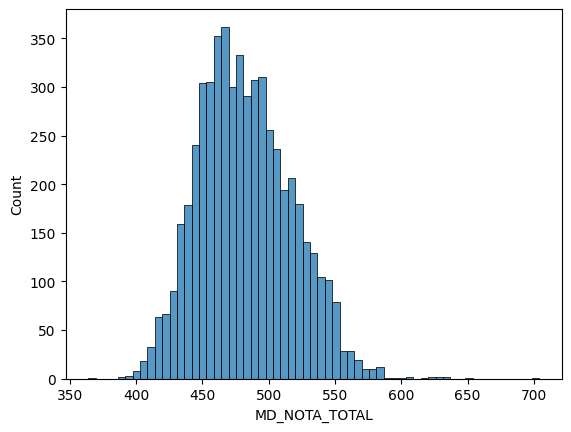

In [12]:
sns.histplot(df_means_municipio, x = "MD_NOTA_TOTAL")

In [15]:

df_means_municipio = df_means_municipio.drop(["MD_NU_NOTA_CN", "MD_NU_NOTA_CH", "MD_NU_NOTA_LC","MD_NU_NOTA_MT"] , axis=1)

In [23]:

df_means_municipio["CO_MUNICIPIO_ESC"] = df_means_municipio["CO_MUNICIPIO_ESC"].apply( lambda x : int(x))
df_means_municipio = df_means_municipio.rename(columns={"CO_MUNICIPIO_ESC" : "CO_MUNICIPIO"})

In [24]:
df_means_municipio

,CO_MUNICIPIO,MD_NOTA_TOTAL
0,1100015,512.174
1,1100023,496.515
2,1100031,487.062
3,1100049,506.960
4,1100056,481.558
...,...,...
5472,5222005,482.386
5473,5222054,470.119
5474,5222203,436.936
5475,5222302,432.442


In [25]:
df_means_municipio.to_parquet("datasets/tratados/enem.parquet")